# Hands-on session I:  Mock catalogues, simulations vs observations - A practical yt-ART tutorial
Tutors: S. Roca-Fàbrega

## Checking out the Roca-Fàbrega et al. (2016) GARROTXA-ART simulation

In this notebook we will play a bit with a snapshot of the cosmological Milky-Way-like galaxy simulations published by [Roca-Fàbrega et al. (2016)](http://adsabs.harvard.edu/abs/2016ApJ...824...94R), using the [yt]-multiplatform analysis tool(https://yt-project.org). 

A large variety of plots and analysis can be done by using yt. A detailed manual on how to use yt and on its capabilities can be found in https://yt-project.org/doc/cookbook/index.html .

### Getting prepared

In order for this tutorial to run, you need to have the conda environment "Athens2022" working on your PC.

To do that you should follow the instructions in:

https://github.com/Santiastro1/Athens_School_2022/blob/main/README.md



### Preparing working folders and data

Once you have your environment installed and working, check that you already have a folder called "Athens_School_2022" in your $HOME (you should if you followed the instructions to create the conda environment, see instructions above this paragraph), and a "HandsOnI" (you are suposed to be inside it if you are reading this notebook).

Now you need to get the data from Google Drive (it will be downloaded in your ~/Downloads folder): 

https://drive.google.com/drive/folders/1kfF5L2T625_GPabMmo7dhPiKStSjeAYV?usp=sharing

Download the GARROTXA_ART_src folder and copy it to your ~/Athens_School_2022/HandsOnII folder. Caution!!! It may be downloaded in multiple compressed files, uncompress them and copy all of them to the GARROTXA_ART_src folder. Once you get all of them, move the folder to the schools folder by typing the following instruction:

> mv ~/Downloads/GARROTXA_ART_src ~/Athens_School_2022/HandsOnII/


For convenience, let's create also a folder where all plots will be stored (im), inside the ~/Athens_School_2022/HandsOnII/ folder:

> cd ~/Athens_School_2022/HandsOnII/

> mkdir im

Now, let' s check out the simulation. 

But, before loading the simulation we need to load yt module and also to define new fields and filters (e.g. metallicity as a new field for gas, filter young stars among all stars in the simulation):

In [42]:
import yt
import numpy as np
import matplotlib.pyplot as plt

def _metallicity_2(field,data):
    return(data["gas","metal_ii_density"]+data["gas","metal_ia_density"])/data["gas","density"]

yt.add_field(("gas","metallicity"),function=_metallicity_2,force_override=True,
              display_name='Metallicity',take_log=True,units="")
def _metallicity_FeH(field,data):
    return(np.log10(data["gas","metal_ia_density"]/data["gas","density"]/0.00178))

yt.add_field(("gas","FeH"),function=_metallicity_FeH,force_override=False,
              display_name='FeH',take_log=False,units="")

def _metallicity_AlfaH(field,data):
    return(np.log10(data["gas","metal_ii_density"]/data["gas","density"]/0.0161))

yt.add_field(("gas","AlfaH"),function=_metallicity_AlfaH,force_override=False,
              display_name='AlfaH',take_log=False,units="")

def _metallicity_AlfaFe(field,data):
    return(np.log10(data["gas","metal_ii_density"]/data["gas","metal_ia_density"])-np.log10(0.0161/0.00178))

yt.add_field(("gas","AlfaFe"),function=_metallicity_AlfaH,force_override=False,
              display_name='AlfaFe',take_log=False,units="")

def young_star_filter(pfilter,data):
    filter=(data[(pfilter.filtered_type,"particle_creation_time")].in_units('Gyr') > 11.)
    return filter
yt.add_particle_filter("young_stars",function=young_star_filter,filtered_type="stars",requires=["particle_creation_time"])

yt : [WARNING  ] 2019-12-27 09:39:29,027 Field ('gas', 'FeH') already exists. To override use force_override=True.
yt : [WARNING  ] 2019-12-27 09:39:29,060 Field ('gas', 'AlfaH') already exists. To override use force_override=True.
yt : [WARNING  ] 2019-12-27 09:39:29,061 Field ('gas', 'AlfaFe') already exists. To override use force_override=True.
yt : [WARNING  ] 2019-12-27 09:39:29,062 The young_stars particle filter already exists. Overriding.


Now run the cell below to load the ART snapshot at z=0 (see information about snapshot properties, provided by yt when loading the snapshot):

In [43]:
ds = yt.load('~/Athens_School_2022/HandsOnII/GARROTXA_ART_src/20MpcBox_HartGalMW003_RUN2.2_a1.001.d')

yt : [INFO     ] 2019-12-27 09:39:31,898 discovered particle_header:/Users/santiastro1/Desktop/GARROTXA_ART/PMcrda1.001.DAT
yt : [INFO     ] 2019-12-27 09:39:31,899 discovered particle_data:/Users/santiastro1/Desktop/GARROTXA_ART/PMcrs0a1.001.DAT
yt : [INFO     ] 2019-12-27 09:39:31,900 discovered particle_stars:/Users/santiastro1/Desktop/GARROTXA_ART/stars_a1.001.dat
yt : [INFO     ] 2019-12-27 09:39:31,963 Using root level of 12
yt : [INFO     ] 2019-12-27 09:39:31,965 Discovered 6 species of particles
yt : [INFO     ] 2019-12-27 09:39:31,965 Particle populations:  15429632   1605120    251520     37784   2081597  22102962 
yt : [INFO     ] 2019-12-27 09:39:32,027 Max level is 11
yt : [INFO     ] 2019-12-27 09:39:32,055 Parameters: current_time              = 13.886914311654069 Gyr
yt : [INFO     ] 2019-12-27 09:39:32,055 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-12-27 09:39:32,056 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2

We add now new filters to the data source (ds):

In [44]:
def _metallicity_star_alfaH(field, data):
    return (np.log10(data[('stars', 'particle_metallicity1')]/0.0161))
ds.add_field(("stars","particle_AlfaH"), function=_metallicity_star_alfaH, take_log=False, particle_type=True, units="")
                     
def _metallicity_star_FeH(field, data):
    return (np.log10(data[('stars', 'particle_metallicity2')]/0.00178))

ds.add_field(("stars","particle_FeH"), function=_metallicity_star_FeH, take_log=False, particle_type=True, units="")

def _metallicity_star_AlfaFe(field, data):
    return (np.log10(data[('stars', 'particle_metallicity1')]/data[('stars', 'particle_metallicity2')])-np.log10(0.0161/0.00178))

ds.add_field(("stars","particle_AlfaFe"), function=_metallicity_star_AlfaFe, take_log=False, particle_type=True, units="")



Now, we ask yt to show us all available fields (included in the snapshot)

In [28]:
ds.field_list

[('all', 'particle_creation_time'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_mass_initial'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_metallicity1'),
 ('all', 'particle_metallicity2'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('art', 'Density'),
 ('art', 'Gamma'),
 ('art', 'GasEnergy'),
 ('art', 'MetalDensitySNII'),
 ('art', 'MetalDensitySNIa'),
 ('art', 'PotentialNew'),
 ('art', 'PotentialOld'),
 ('art', 'Pressure'),
 ('art', 'TotalEnergy'),
 ('art', 'XMomentumDensity'),
 ('art', 'YMomentumDensity'),
 ('art', 'ZMomentumDensity'),
 ('darkmatter', 'particle_creation_time'),
 ('darkmatter', 'particle_index'),
 ('darkmatter', 'particle_mass'),
 ('darkmatter', 'particle_mass_initial'),
 ('darkmatter', 'particle_metallicity'),
 ('darkmatter', 'particle_metallicity1

Yt creates derived fields from the main ones. We ask for information about the derived fields created by yt.

Note that the new fields we have just defined (e.g. particle_AlfaFe) also appear now in the derived_field_list:

In [29]:
ds.derived_field_list

[('all', 'mesh_id'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_creation_time'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_mass_initial'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_metallicity1'),
 ('all', 'particle_metallicity2'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_sph

Now we load all data in the snapshot in the "ad" object.

In [45]:
ad=ds.all_data()

Now all fields can be explored easily by:

In [7]:
print(ad[('all','particle_mass')])

[1.85893633e+38 1.85893633e+38 1.85893633e+38 ... 6.41398782e+37
 5.67333904e+37 5.93863614e+37] g


Units can be changed from the "default code units", by using the "in_units" function:

In [8]:
print(ad[('all','particle_mass')].in_units('Msun')) #'kg, g, ...'

[93488.3071918  93488.3071918  93488.3071918  ... 32256.77257231
 28531.95430142 29866.16762388] Msun


In [12]:
print(ad[('stars','particle_creation_time')].in_units('Myr'))

yt : [INFO     ] 2019-12-26 09:20:11,128 Interpolating ages


[  296.32604923   296.32604923   312.48918981 ... 13867.2273953
 13867.2273953  13867.2273953 ] Myr


What is the unique identifier of a particle?

In [13]:
print(ad[('all','particle_index')])

[0.0000000e+00 1.0000000e+00 2.0000000e+00 ... 4.1508612e+07 4.1508613e+07
 4.1508614e+07] dimensionless


How many particles do we have?

In [14]:
print('n_all = %e: ndark = %e, nstar = %e\n'%(len(ad[('all','particle_mass')]),len(ad[('darkmatter','particle_mass')]),len(ad[('stars','particle_mass')])))

n_all = 4.150862e+07: ndark = 1.940565e+07, nstar = 2.210296e+07



How many gas cells do we have?

In [15]:
print('ngas = %e\n'%(len(ad[('art','Density')])))

ngas = 1.319719e+08



Where is the center of the main galaxy in the snapshot?

We first center the analysis box on the location with maximum stellar density. Later, iteratively, we recenter the box to the "all particles" center of mass.

speX (X being an integer) is a new spherical object centered on "center" and with a radius "rad", according to the sphere function: "ds.spere(center,rad)"

In [ ]:
#c1=ad.quantities.max_location(('deposit', 'stars_density'))
#print(c1)
#c2=[c1[1],c1[2],c1[3]]
#print(c2)
#spe1=ds.sphere(c2,(500,'kpc'))
#center=spe1.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")

In [31]:
c1=ad.quantities.max_location(('deposit', 'stars_density'))
print(c1)
c2=[c1[1],c1[2],c1[3]]
print(c2)
spe0=ds.sphere(c2,(500,'kpc'))
c3=spe0.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")

spe1=ds.sphere(c3,(200,'kpc'))
c4=spe1.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")

spe2=ds.sphere(c4,(50,'kpc'))
c5=spe2.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")

spe3=ds.sphere(c5,(10,'kpc'))
c6=spe3.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")
print(c6.in_units("cm"))

spe4=ds.sphere(c6,(2,'kpc'))
c7=spe4.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")
print(c7.in_units("cm"))

spe5=ds.sphere(c7,(0.2,'kpc'))
center=spe5.quantities.center_of_mass(use_gas=False,use_particles=True, particle_type = "stars")
print(center.in_units("cm"))

[3.328612982620225e-22 g/cm**3, 4.974879084182901e+25 cm, 8.681897694066063e+24 cm, 7.218335462890018e+25 cm]
[4.974879084182901e+25 cm, 8.681897694066063e+24 cm, 7.218335462890018e+25 cm]
[4.97487252e+25 8.68224892e+24 7.21834923e+25] cm
[4.97487330e+25 8.68223288e+24 7.21834569e+25] cm
[4.97487381e+25 8.68221769e+24 7.21834394e+25] cm


Following the yt cookbook we can make a large variety of "simple plots": https://yt-project.org/doc/cookbook/simple_plots.html

An example is a gas density slice plot:

yt : [INFO     ] 2019-12-26 09:25:05,962 xlim = 0.084370 0.112334
yt : [INFO     ] 2019-12-26 09:25:05,964 ylim = 0.803713 0.831677
yt : [INFO     ] 2019-12-26 09:25:05,966 xlim = 0.084370 0.112334
yt : [INFO     ] 2019-12-26 09:25:05,967 ylim = 0.803713 0.831677
yt : [INFO     ] 2019-12-26 09:25:05,982 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



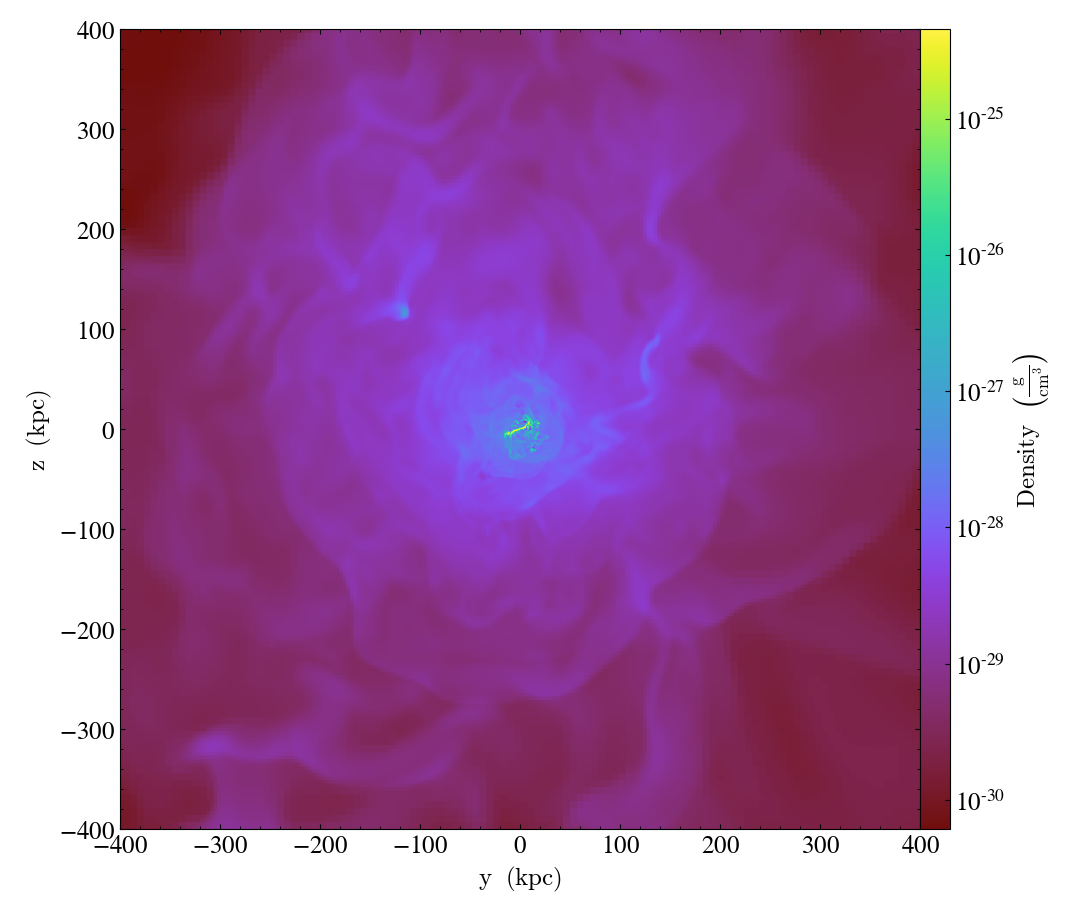

In [17]:
yt.SlicePlot(ds, 'x', "density", width = (800.0, 'kpc'),center=center)

We can save it in a file just by adding the ".save('filename.png')" command:

In [18]:
yt.SlicePlot(ds, 'x', "density", width = (800.0, 'kpc'),center=center).save('test.png')

yt : [INFO     ] 2019-12-26 09:25:26,824 xlim = 0.084370 0.112334
yt : [INFO     ] 2019-12-26 09:25:26,825 ylim = 0.803713 0.831677
yt : [INFO     ] 2019-12-26 09:25:26,826 xlim = 0.084370 0.112334
yt : [INFO     ] 2019-12-26 09:25:26,826 ylim = 0.803713 0.831677
yt : [INFO     ] 2019-12-26 09:25:26,829 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-12-26 09:25:27,239 Saving plot test.png


['test.png']

We can also produce Phase plots of all data in the "ad" object or in an sphere "spX" (e.g. Temperature-Density):

In [1]:
p=yt.PhasePlot(spe1, "density", "temperature", "cell_mass",
                    weight_field=None, fractional=True)
p.set_xlim(1e-28, 1e-20)
p.set_ylim(10, 1e7)

NameError: name 'yt' is not defined

Simple radial profiles:


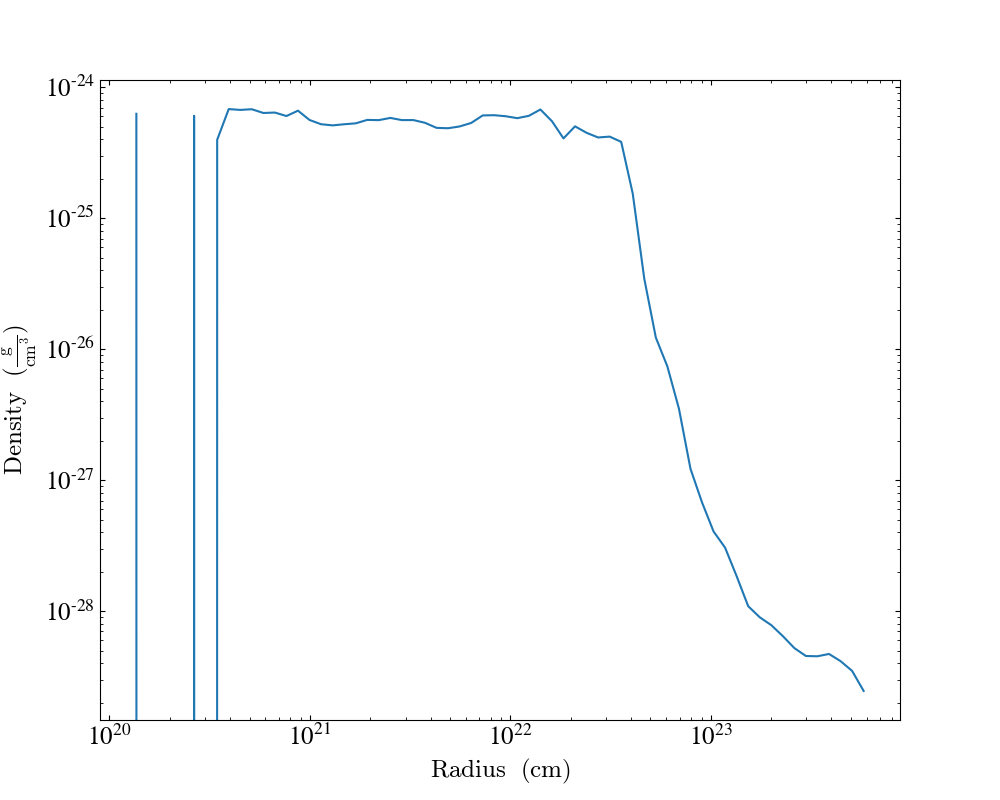

In [20]:
yt.ProfilePlot(spe1, "radius", "density",
                      weight_field="cell_mass")

We can also plot stars/DM properties by using the "Particle functions"

yt : [INFO     ] 2019-12-26 09:27:57,111 xlim = 0.560059 0.567050
yt : [INFO     ] 2019-12-26 09:27:57,113 ylim = 0.094857 0.101848
yt : [INFO     ] 2019-12-26 09:27:57,114 xlim = 0.560059 0.567050
yt : [INFO     ] 2019-12-26 09:27:57,115 ylim = 0.094857 0.101848
yt : [INFO     ] 2019-12-26 09:27:57,117 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh
/anaconda2/envs/Python3.7_env/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



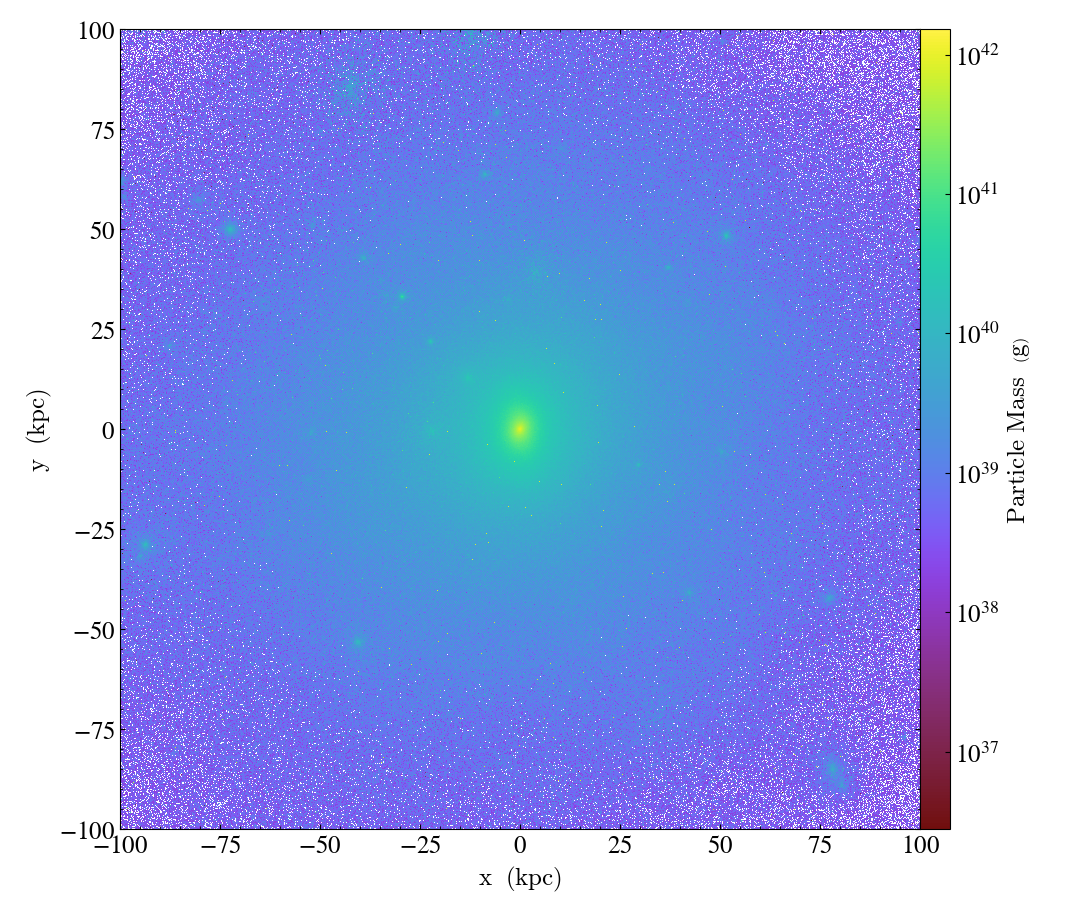

In [21]:
yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'particle_mass', width=(200,'kpc'),center=center)

yt : [INFO     ] 2019-12-26 09:28:02,528 xlim = 0.560059 0.567050
yt : [INFO     ] 2019-12-26 09:28:02,529 ylim = 0.094857 0.101848
yt : [INFO     ] 2019-12-26 09:28:02,530 xlim = 0.560059 0.567050
yt : [INFO     ] 2019-12-26 09:28:02,531 ylim = 0.094857 0.101848
yt : [INFO     ] 2019-12-26 09:28:02,532 Splatting (('stars', 'particle_mass')) onto a 800 by 800 mesh
/anaconda2/envs/Python3.7_env/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



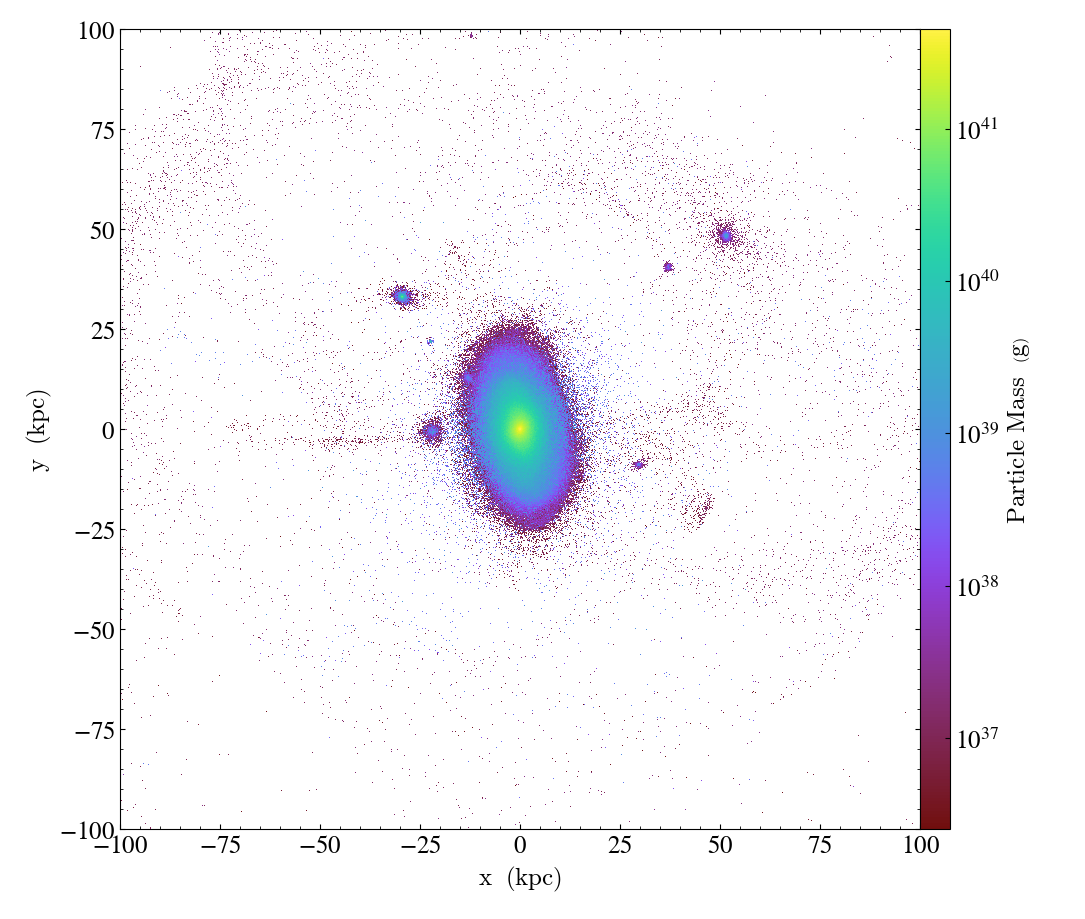

In [22]:
yt.ParticlePlot(ds, ('stars','particle_position_x'), ('stars','particle_position_y'), ('stars','particle_mass'), width=(200,'kpc'),center=center)

Now we test the new field we created before loading the simulation (e.g. metallicity):

In [23]:
#Fields from the snapshot
print(ad[('gas','metal_ii_density')],ad[('gas','metal_ii_density')],ad[('gas','density')])

#New metallicity field
print(ad[('gas','metallicity')])

[2.75176151e-45 2.75176151e-45 2.75176151e-45 ... 2.75176151e-45
 2.75176151e-45 2.75176151e-45] g/cm**3 [2.75176151e-45 2.75176151e-45 2.75176151e-45 ... 2.75176151e-45
 2.75176151e-45 2.75176151e-45] g/cm**3 [4.65574733e-32 3.35840601e-32 3.35724661e-32 ... 7.89149752e-32
 6.91118435e-32 6.47946037e-32] g/cm**3
[1.18209229e-13 1.63873070e-13 1.63929662e-13 ... 6.97399068e-14
 7.96321259e-14 8.49379842e-14] dimensionless


We can also view the filtered data (e.g. young stars):

yt : [INFO     ] 2019-12-27 09:43:18,669 xlim = 0.561761 0.565256
yt : [INFO     ] 2019-12-27 09:43:18,670 ylim = 0.096596 0.100091
yt : [INFO     ] 2019-12-27 09:43:18,675 xlim = 0.561761 0.565256
yt : [INFO     ] 2019-12-27 09:43:18,676 ylim = 0.096596 0.100091
yt : [INFO     ] 2019-12-27 09:43:18,678 Splatting (('young_stars', 'particle_AlfaFe')) onto a 800 by 800 mesh
yt : [INFO     ] 2019-12-27 09:43:19,182 Interpolating ages



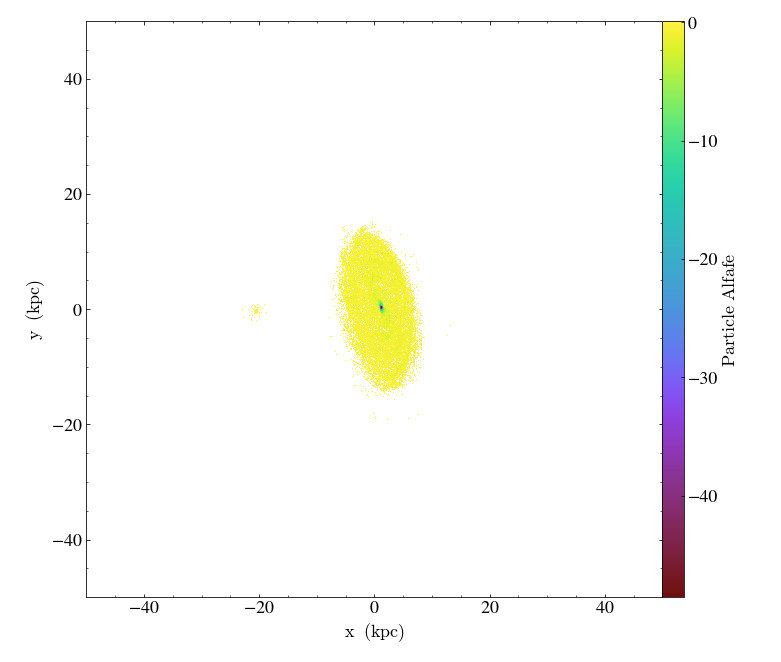

In [47]:
ds.add_particle_filter("young_stars")
yt.ParticlePlot(ds, ('young_stars','particle_position_x'), ('young_stars','particle_position_y'), ('young_stars','particle_AlfaFe'), width=(100,'kpc'),center=center)

We now compute the young stars angular momentum in spe3 (10kpc from center)

In [33]:
angular_momentum_young = spe3.quantities.angular_momentum_vector(use_gas=False,use_particles=True,particle_type='young_stars')
print (angular_momentum_young)

[ 3.77594287e+29  7.95869683e+28 -1.90356149e+29] cm**2/s


Face-on gas disk according to young stars angular momentum vector

yt : [INFO     ] 2019-12-26 09:32:23,891 xlim = -0.001748 0.001748
yt : [INFO     ] 2019-12-26 09:32:23,892 ylim = -0.001748 0.001748
yt : [INFO     ] 2019-12-26 09:32:23,895 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



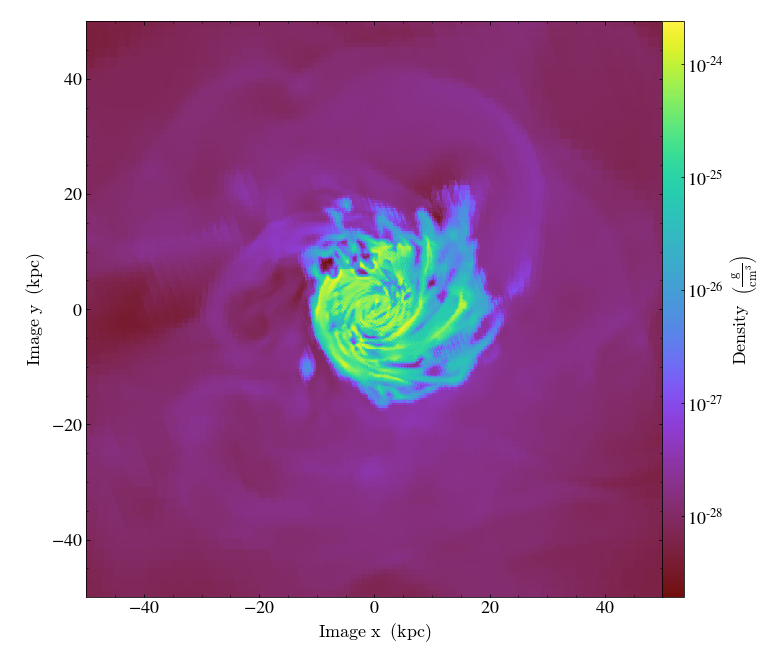

In [30]:
yt.OffAxisSlicePlot(ds, angular_momentum_young, "density", spe5.center, (100, "kpc"))

Many more, and more complex plots can be done by using yt functions (see yt cookbook for more examples).

Compute the rotation curve of this galaxy (total & separate for each component) by extracting radial mass profiles:

In [28]:
Mgas=yt.create_profile(spe1, "radius", "cell_mass", weight_field=None, accumulation=True, 
                    units={'radius': 'kpc', 'cell_mass': 'Msun'},extrema={'radius': (1e-2, 2e2)})
Mstar=yt.create_profile(spe1, ('stars','particle_spherical_position_radius'), 
                     ('stars',"particle_mass"), weight_field=None, accumulation=True,
                     units={('stars','particle_spherical_position_radius'): 'kpc', ('stars','particle_mass'): 'Msun'}
                     ,extrema={('stars','particle_spherical_position_radius'): (1e-2, 2e2)})
MDM=yt.create_profile(spe1, ('darkmatter','particle_spherical_position_radius'), 
                   ('darkmatter',"particle_mass"), weight_field=None, accumulation=True,
                    units={('darkmatter','particle_spherical_position_radius'): 'kpc', ('darkmatter','particle_mass'): 'Msun'}
                     ,extrema={('darkmatter','particle_spherical_position_radius'): (1e-2, 2e2)})
#print(Mgas.x.in_units('kpc'))
# print the profiled cell_mass field
#print(Mgas['cell_mass'].in_units('Msun'))

Now we compute the circular velocity curve (Newton's approximation)

In [29]:
from yt.units import G

#print ("Newton's constant: ", G)
Vcir_gas=np.sqrt(G*Mgas['cell_mass'].in_units('g')/Mgas.x.in_units('cm'))
Vcir_DM=np.sqrt(G*MDM[('darkmatter',"particle_mass")].in_units('g')/MDM.x.in_units('cm'))
Vcir_star=np.sqrt(G*Mstar[('stars',"particle_mass")].in_units('g')/Mstar.x.in_units('cm'))
Vcir_tot=np.sqrt(G*(Mgas['cell_mass'].in_units('g')+MDM[('darkmatter',"particle_mass")].in_units('g')+Mstar[('stars',"particle_mass")].in_units('g'))/Mgas.x.in_units('cm'))
#print(Vcir_tot.in_units('km/s'))
#print(Mgas.x.in_units('kpc'))

We plot the circular velocity curves using matplotlib

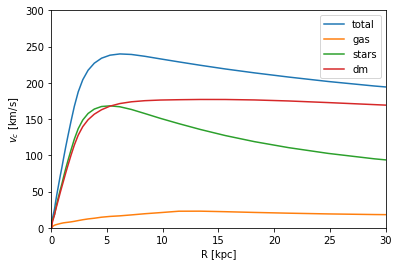

In [31]:

plt.plot(Mgas.x.in_units('kpc'),Vcir_tot.in_units('km/s'),label='total')
plt.plot(Mgas.x.in_units('kpc'),Vcir_gas.in_units('km/s'),label='gas')
plt.plot(Mstar.x.in_units('kpc'),Vcir_star.in_units('km/s'),label='stars')
plt.plot(MDM.x.in_units('kpc'),Vcir_DM.in_units('km/s'),label='dm')
plt.axis([0,30,0,300])

plt.xlabel('R [kpc]')
plt.ylabel(r'$v_c$ [km/s]')
plt.legend()
plt.show()

Now we examine the [$\alpha$/Fe] space:

In [50]:
plot=yt.PhasePlot(spe1, ('stars', 'particle_FeH'), ('stars', 'particle_AlfaFe'), ('stars',"particle_mass"),
                    weight_field=None, fractional=True)
plot.set_xlim(-1.5, 0.5)
plot.set_ylim(-1, 1)
plot.set_xlabel(r"[Fe/H]")
plot.set_ylabel(r"[O/Fe]")
plot.save("./im/AlfaFe_ART.png")

yt : [INFO     ] 2019-12-27 09:45:58,169 Saving plot ./im/AlfaFe_ART.png


['./im/AlfaFe_ART.png']

## Investigating the radial [Fe/H] gradient in the simulated disc

In [51]:
prof=yt.create_profile(spe1, ('stars', 'particle_radius'),('stars', 'particle_FeH'),
                            weight_field=('stars', 'particle_mass'),n_bins=(50, 50),
                       units={('stars', 'particle_radius'): 'kpc', ('stars', 'particle_FeH'): ''}
                     ,extrema={('stars', 'particle_radius'): (1e-1, 2e1)})
profgas=yt.create_profile(spe1, ('radius'),(('gas', 'FeH')),
                            weight_field=('cell_mass'),n_bins=(50, 50),
                       units={('radius'): 'kpc', ('gas','FeH'): ''}
                     ,extrema={('radius'): (1e-1, 2e1)})
prof=yt.create_profile(spe1, ('stars', 'particle_radius'),('stars', 'particle_AlfaH'),
                            weight_field=('stars', 'particle_mass'),n_bins=(50, 50),
                       units={('stars', 'particle_radius'): 'kpc', ('stars', 'particle_AlfaH'): ''}
                     ,extrema={('stars', 'particle_radius'): (1e-1, 2e1)})
profgas=yt.create_profile(spe1, ('radius'),(('gas', 'AlfaH')),
                            weight_field=('cell_mass'),n_bins=(50, 50),
                       units={('radius'): 'kpc', ('gas','AlfaH'): ''}
                     ,extrema={('radius'): (1e-1, 2e1)})

plt.plot(prof.x.in_units('kpc'),prof[('stars', 'particle_FeH')],'-k',label="Stars of all ages")
plt.plot(profgas.x.in_units('kpc'),profgas[('gas', 'FeH')],'--k',label="Gas")
plt.plot(prof.x.in_units('kpc'),prof[('stars', 'particle_AlfaH')],'-b',label="Stars of all ages")
plt.plot(profgas.x.in_units('kpc'),profgas[('gas', 'AlfaH')],'--b',label="Gas")
plot.set_xlabel(r"R (kpc)")
plot.set_ylabel(r"[M/H]")


KeyError: "Asked for field '('stars', 'particle_FeH')' but only have data for field 'None'"